In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df = pd.read_csv("Data/train.csv")

In [49]:
print(df.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [50]:
cat_col = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]
numeric_col = [col for col in df.columns if col not in cat_col and col != 'id' and col != 'Response']

In [51]:
for column in cat_col:
    print(column)
    print(df[column].value_counts(dropna=False))
    print()

Gender
Gender
Male      6228134
Female    5276664
Name: count, dtype: int64

Driving_License
Driving_License
1    11482041
0       22757
Name: count, dtype: int64

Region_Code
Region_Code
28.0    3451062
8.0     1021036
46.0     578208
41.0     557581
15.0     403977
30.0     367307
29.0     338146
50.0     302334
11.0     278261
36.0     261946
3.0      246303
33.0     232387
47.0     229190
35.0     200035
6.0      181122
45.0     159292
37.0     158976
18.0     148548
39.0     138068
14.0     134585
21.0     126793
10.0     126081
2.0      118097
48.0     114230
13.0     108838
9.0       93371
7.0       92240
12.0      92142
27.0      78878
32.0      78797
43.0      75868
17.0      74533
26.0      71228
25.0      70556
24.0      69136
38.0      60587
0.0       59274
20.0      58765
31.0      58442
16.0      54905
23.0      54518
4.0       52504
49.0      50822
34.0      48685
19.0      44197
22.0      36932
5.0       36832
40.0      35888
1.0       33966
44.0      20305
42.0      13

In [52]:
df.size

138057576

In [53]:
df.dropna()
df.size

138057576

In [54]:
print(numeric_col)

['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


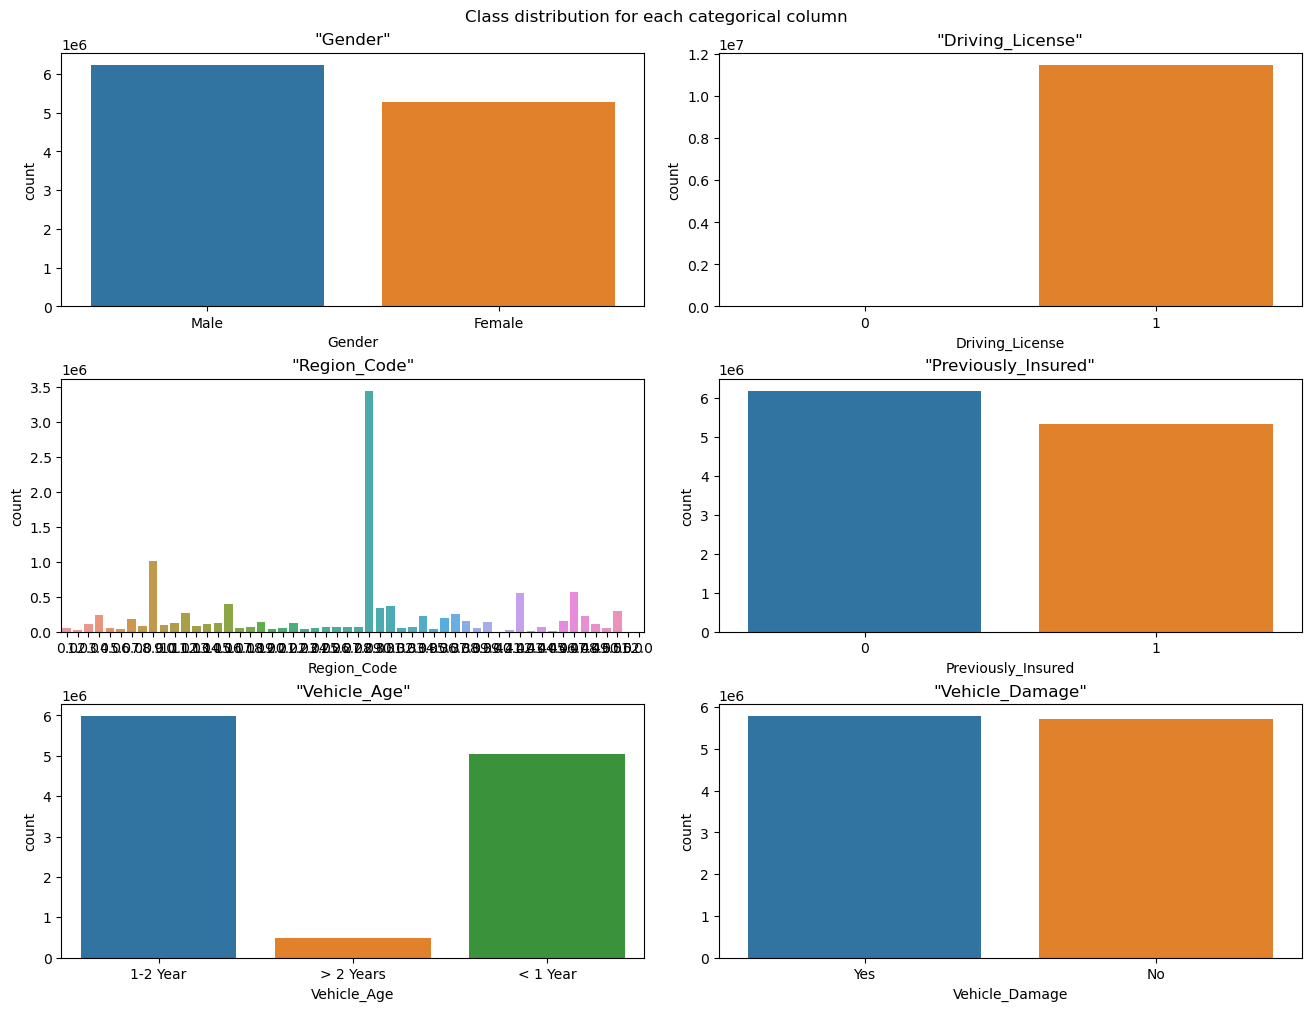

In [55]:
fig_rows = len(cat_col)//2
fig_cols = 2
figure, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,10), constrained_layout=True)
figure.suptitle('Class distribution for each categorical column')
for i in range(fig_rows):
    for j in range(fig_cols):
        axes[i, j].set_title(f'"{cat_col[2*i+j]}"')
        sns.countplot(ax = axes[i, j], data = df, x = cat_col[2*i+j])
        

In [56]:
percent_males = 100*len(df[df['Gender'] == 'Male']) / len(df)
print(percent_males)

54.1351008509667


In [57]:
percent_without_DL = 100*len(df[df['Driving_License'] == 0]) / len(df)
print(percent_without_DL)

0.19780442907385248


In [58]:
percent_rgc_28 = 100*len(df[df['Region_Code'] == 28.0]) / len(df)
print(percent_rgc_28)
percent_rgc_8 = 100*len(df[df['Region_Code'] == 8.0]) / len(df)
print(percent_rgc_8)

29.99671962949719
8.874871162448919


In [59]:
percent_without_insurance = 100*len(df[df['Previously_Insured'] == 0.0]) / len(df)
print(percent_without_insurance)

53.70034310902286


In [60]:
percent_12_vehicle_age = 100*len(df[df['Vehicle_Age'] == '1-2 Year']) / len(df)
print(percent_12_vehicle_age)
percent_1_vehicle_age = 100*len(df[df['Vehicle_Age'] == '< 1 Year']) / len(df)
print(percent_1_vehicle_age)

52.00159098838589
43.843838023057856


Initial Observations of Categorical Columns:
1. Gender: Gender distribution is roughly even with a slight skew towards males at 54.14%.
2. Driving License: People are predominantly insured. Only about 0.198% do not have a driving license. Will probably drop this column in Logistic Regression.
3. Region code: Region Code 28.0 accounts for roughl 30.0% of the data. Followed by Code 8.0 at 8.88%. The rest are more evenly distributed.
4. Previously_ensured: Roughly even but skewed slightly towards drivers who did not previously have insurance (53.7%).
5. Vehicle_age: Majority of the vehicles are between 1-2 years (52%)
6. Vehicle_Damage: Almost50/50 distribution

C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

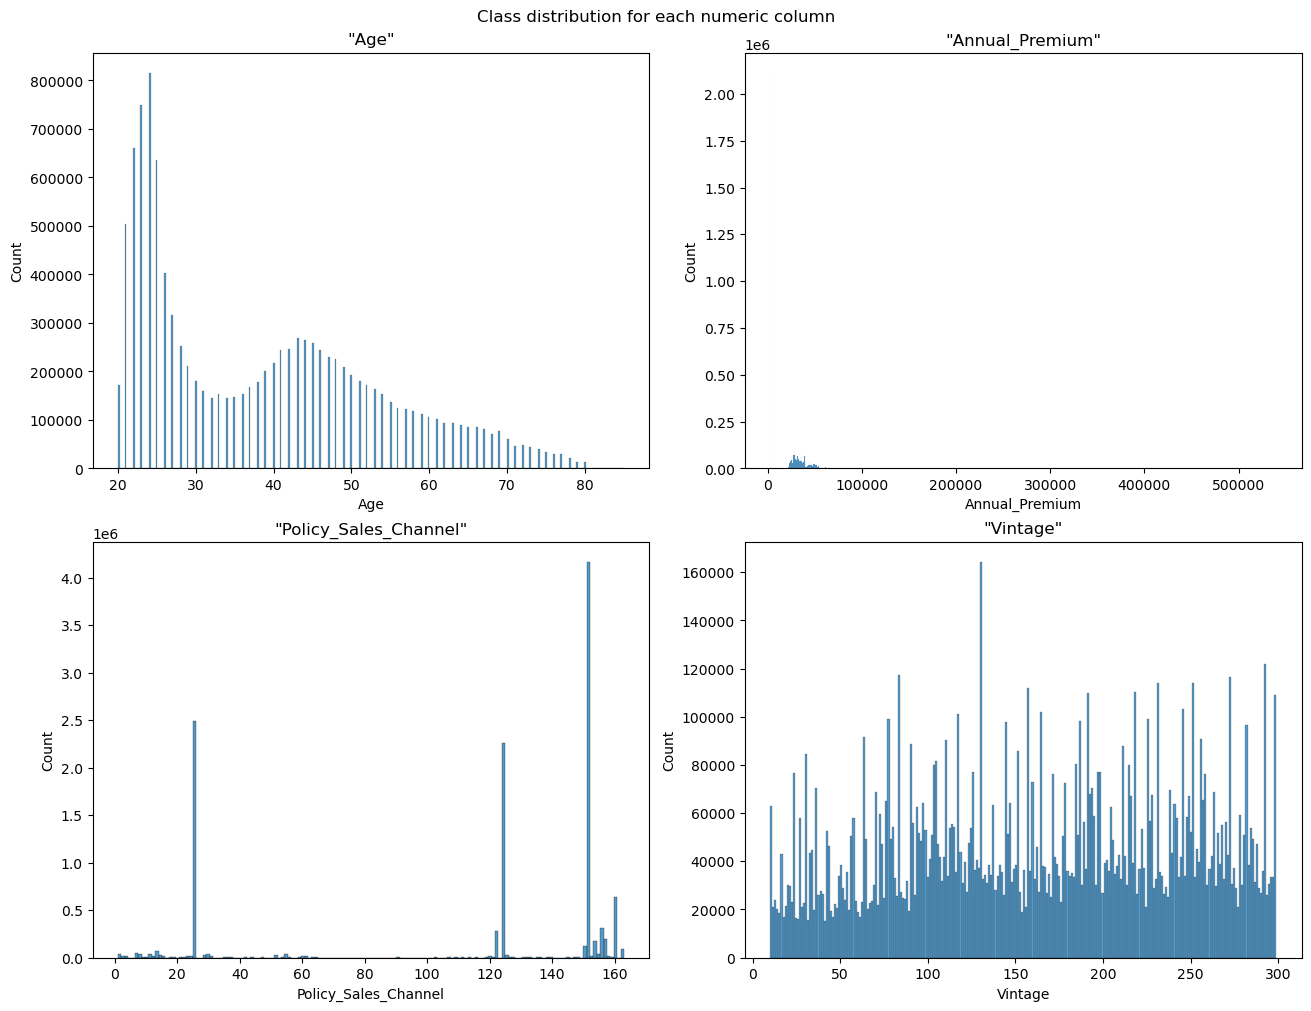

In [61]:
fig_rows = len(numeric_col)//2
fig_cols = 2
figure, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,10), constrained_layout=True)
figure.suptitle('Class distribution for each numeric column')
for i in range(fig_rows):
    for j in range(fig_cols):
        axes[i, j].set_title(f'"{numeric_col[2*i+j]}"')
        sns.histplot(ax = axes[i, j], data = df, x = numeric_col[2*i+j])

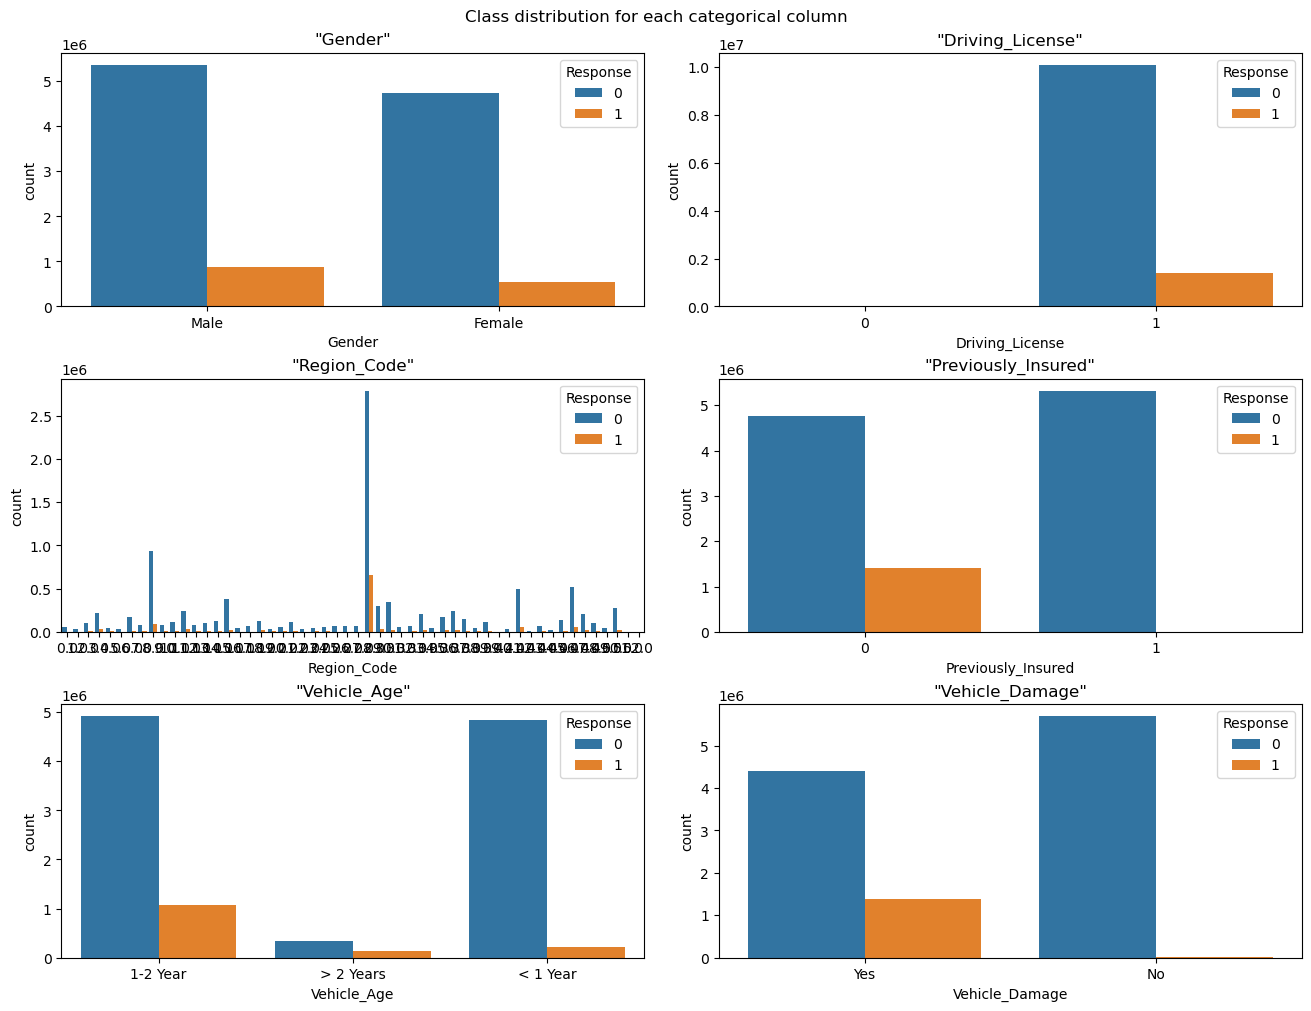

In [64]:
fig_rows = len(cat_col)//2
fig_cols = 2
figure, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,10), constrained_layout=True)
figure.suptitle('Class distribution for each categorical column')
for i in range(fig_rows):
    for j in range(fig_cols):
        axes[i, j].set_title(f'"{cat_col[2*i+j]}"')
        sns.countplot(ax = axes[i, j], data = df, x = cat_col[2*i+j], hue = 'Response')

C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\_oldcore.py:1075: FutureW

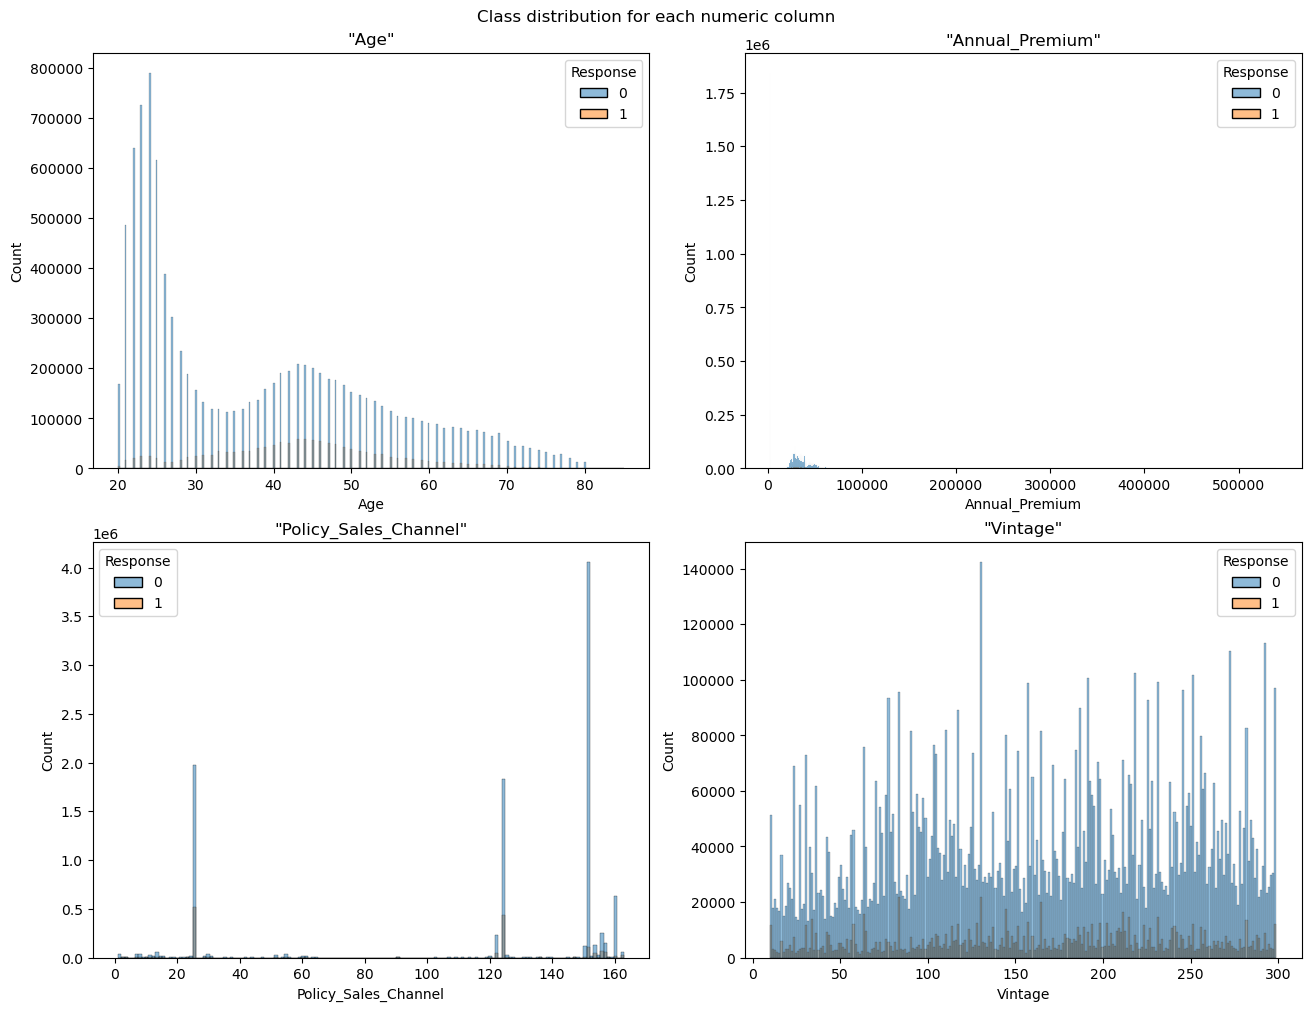

In [66]:
fig_rows = len(numeric_col)//2
fig_cols = 2
figure, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,10), constrained_layout=True)
figure.suptitle('Class distribution for each numeric column')
for i in range(fig_rows):
    for j in range(fig_cols):
        axes[i, j].set_title(f'"{numeric_col[2*i+j]}"')
        sns.histplot(ax = axes[i, j], data = df, x = numeric_col[2*i+j], hue = 'Response')

In [62]:
for col in numeric_col:
    print(f'name: {col}')
    print(f'max value: {df[col].max()}')
    print(f'min value: {df[col].min()}')
    print()
    print()

name: Age
max value: 85
min value: 20


name: Annual_Premium
max value: 540165.0
min value: 2630.0


name: Policy_Sales_Channel
max value: 163.0
min value: 1.0


name: Vintage
max value: 299
min value: 10




In [89]:
ages_bin = [20, 40, 60, 80, 100]
premium_bin = [0, 100_000, np.inf]
policy_bin = [0, 45, 90, 135, 180]
vintage_bin = [0, 50, 100, 150, 200, 250, 300]
bins = [ages_bin, premium_bin, policy_bin, vintage_bin]

In [90]:
df_binned = df.copy()
for col, bin in zip(numeric_col, bins):
    df_binned[col] = pd.cut(df_binned[col], bin)

In [91]:
df_binned_cols = [col for col in df_binned.columns if col != 'id' and col != 'Response']

C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\moham\anaconda3\envs\DS\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

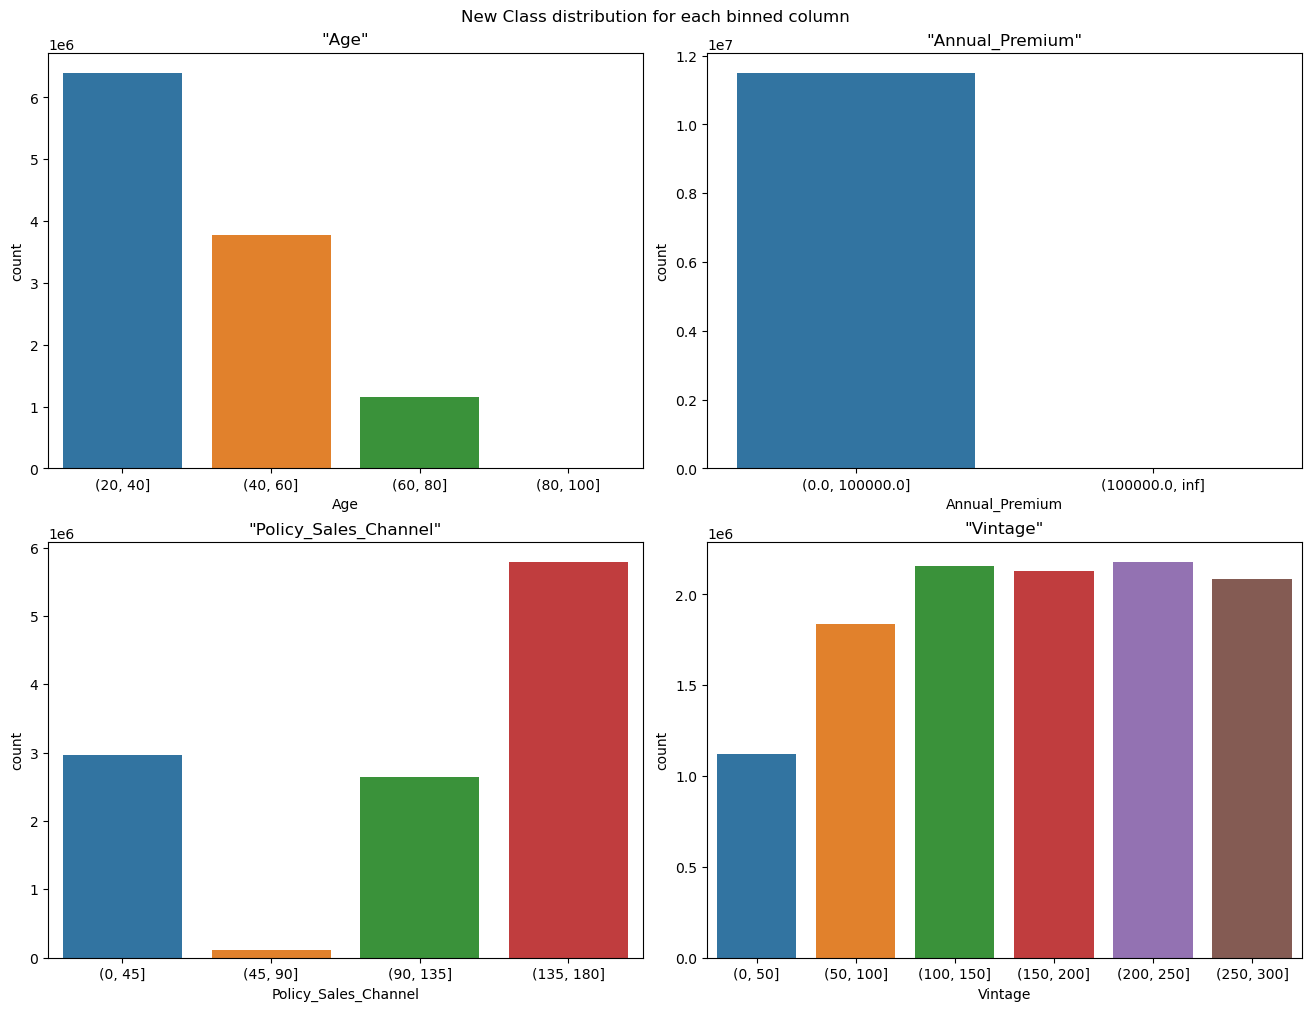

In [94]:
fig_rows = len(numeric_col)//2
fig_cols = 2
figure, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,10), constrained_layout=True)
figure.suptitle('New Class distribution for each binned column')
for i in range(fig_rows):
    for j in range(fig_cols):
        axes[i, j].set_title(f'"{numeric_col[2*i+j]}"')
        sns.countplot(ax = axes[i, j], data = df_binned, x = numeric_col[2*i+j])

In [84]:
df_binned

id  Gender       Age  Driving_License  Region_Code  \
0                0    Male  (20, 40]                1         35.0   
1                1    Male  (40, 60]                1         28.0   
2                2  Female  (20, 40]                1         14.0   
3                3  Female  (20, 40]                1          1.0   
4                4  Female  (20, 40]                1         15.0   
...            ...     ...       ...              ...          ...   
11504793  11504793    Male  (40, 60]                1          6.0   
11504794  11504794  Female  (20, 40]                1         36.0   
11504795  11504795  Female  (20, 40]                1         32.0   
11504796  11504796  Female  (40, 60]                1         28.0   
11504797  11504797    Male  (20, 40]                1         28.0   

          Previously_Insured Vehicle_Age Vehicle_Damage Annual_Premium  \
0                          0    1-2 Year            Yes    (0, 100000]   
1                          0   > 2 Years            Yes    (0, 100000]   
2                          1    < 1 Year             No    (0, 100000]   
3                          0    1-2 Year            Yes    (0, 100000]   
4                          1    1-2 Year             No    (0, 100000]   
...                      ...         ...            ...            ...   
11504793                   0    1-2 Year            Yes    (0, 100000]   
11504794                   0    < 1 Year            Yes    (0, 100000]   
11504795                   1    < 1 Year             No    (0, 100000]   
11504796                   0    1-2 Year            Yes    (0, 100000]   
11504797                   1    < 1 Year             No    (0, 100000]   

         Policy_Sales_Channel     Vintage  Response  
0                   (90, 135]  (150, 200]         0  
1                     (0, 45]  (250, 300]         1  
2                  (135, 180]  (250, 300]         0  
3                  (135, 180]   (50, 100]         0  
4                  (135, 180]  (250, 300]         0  
...                       ...         ...       ...  
11504793              (0, 45]  (200, 250]         0  
11504794           (135, 180]  (100, 150]         1  
11504795           (135, 180]  (150, 200]         0  
11504796              (0, 45]  (250, 300]         1  
11504797           (135, 180]  (150, 200]         0  

[11504798 rows x 12 columns]